<h1 style='color:white'>TP Integrador - CaC Big Data</h1>
<center><img src ='./img/portada.png'></center>

**Alumno: Pablo G. Correa**
**Comisión: 22614**
**Diciembre 2022**

In [1]:
# A veces necesitamos instalar nuevas librerías en nuestros proyectos
!pip install openpyxl==3.0.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 21.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [1]:
# imports
import numpy as np
import pandas as pd
import sqlite3 as sql3
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns


<h2>Paso 1: Alcances del proyecto y obtener datos</h2>
<h3>Alcances del proyecto</h3>
<p>En este proyecto vamos a integrar tres sets de datos con lista de vendedores, lista de artículos y registro de operaciones de un mes, que nos ayudarán a responder a las preguntas: </p>
<ul>
<li>¿Cuál es el artículo más vendido? (unidades)</li>
<li>¿Qué artículo es el que más ingresos nos proporcionó?</li>
<li>¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</li>
<li>¿Hay grandes variaciones en ventas a lo largo del mes?</li>
</ul>
<p>Para este proyecto utilizaremos herramientas de Pandas para análisis exploratorio, Numpy para el análisis de ciertas columnas y Matplotlib/Seaborn para visualización de resultados.</p>

<h3>Descripción y obtención de los datos</h3>
<h4>Fuentes de datos</h4>
<ul>
<li>articles.db: BD con datos de los artículos.</li>
<li>sellers.xlsx: datos de los vendedores.</li>
<li>orders.csv: registro de las ventas de un mes.</li>
</ul>

In [3]:
# Levanto los datos en 3 diferentes dataframes

# Articulos
conn = sql3.connect('./data/articles.db')
sql_query = pd.read_sql_query('SELECT * FROM articles', conn)
df_articles = pd.DataFrame(sql_query, columns=['article_id', 'article_name', 'unit_price'])

# Vendedores
df_sellers = pd.read_excel('./data/sellers.xlsx', index_col=0)

# Ordenes
df_orders = pd.read_csv('./data/orders.csv')

<h2>Paso 2: Explorar y preparar los datos</h2>
<h3>Exploración</h3>

In [4]:
# Exploración del df de artículos
print('Muestra de datos')
print(df_articles.head()) # head() 5 Filas por defecto
print('\nFormato del dataframe')
print(df_articles.shape)
print('\nBúsqueda de valores null por columna')
print(df_articles.isnull().sum())
print('\nFormato de los datos por columna')
print(df_articles.dtypes)

Muestra de datos
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Formato del dataframe
(31, 3)

Búsqueda de valores null por columna
article_id      0
article_name    0
unit_price      0
dtype: int64

Formato de los datos por columna
article_id       int64
article_name    object
unit_price      object
dtype: object


In [5]:
print('\n Resumen de información del set de datos de artículos')
print(df_articles.info())


 Resumen de información del set de datos de artículos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    31 non-null     int64 
 1   article_name  31 non-null     object
 2   unit_price    31 non-null     object
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes
None


In [6]:
# Exploración del df de vendedores
print('Muestra de datos')
print(df_sellers.head()) # head() 5 Filas por defecto
print('\nFormato del dataframe')
print(df_sellers.shape)
print('\nBúsqueda de valores null por columna')
print(df_sellers.isnull().sum())
print('\nFormato de los datos por columna')
print(df_sellers.dtypes)

Muestra de datos
                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres

Formato del dataframe
(15, 1)

Búsqueda de valores null por columna
seller_name    0
dtype: int64

Formato de los datos por columna
seller_name    object
dtype: object


In [7]:
print('\n Resumen de información del set de datos de vendedores')
print(df_sellers.info())


 Resumen de información del set de datos de vendedores
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   seller_name  15 non-null     object
dtypes: object(1)
memory usage: 240.0+ bytes
None


In [8]:
# Exploración del df de órdenes
print('Muestra de datos')
print(df_orders.head()) # head() 5 Filas por defecto
print('\nFormato del dataframe')
print(df_orders.shape)
print('\nBúsqueda de valores null por columna')
print(df_orders.isnull().sum())
print('\nFormato de los datos por columna')
print(df_orders.dtypes)

Muestra de datos
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Formato del dataframe
(1000, 6)

Búsqueda de valores null por columna
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Formato de los datos por columna
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


In [9]:
print('\n Resumen de información del set de datos de órdenes')
print(df_orders.info())


 Resumen de información del set de datos de órdenes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      1000 non-null   int64 
 1   week          1000 non-null   int64 
 2   article_id    1000 non-null   int64 
 3   quantity      1000 non-null   int64 
 4   seller_id     1000 non-null   int64 
 5   country_name  1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB
None


<h3>Preparación</h3>
<p>Encuentro un inconveniente en la columna de precios de los artículos. Necesito cambiar el formato cadena a float.</p>

In [10]:
df_articles['unit_price'] = df_articles['unit_price'].astype(float)
print(df_articles.dtypes)

article_id        int64
article_name     object
unit_price      float64
dtype: object


También modifico el type de la columna "semana" para considerarla una variable categórica. Esto será útil para la visualización.


In [11]:
df_orders['week'] = df_orders['week'].astype(str)
print(df_orders.dtypes)

order_id         int64
week            object
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


<h2>Paso 3: Definir el modelo de datos</h2>
<p>Crearemos un nuevo dataframe a partir de las fuentes de datos proporcionados.</p>
<img src='./img/modelo.png'>


<h2>Paso 4: Correr los pipelines para modelar los datos</h2>
<p>Llamamos pipeline a una serie de procesos en el cual la salida de un proceso es la entrada que utiliza el siguiente proceso.</p>

En el pipeline se construye la tabla "my_df" a partir de las tablas de vendedores, órdenes y artículos, haciendo joins de los dataframes. 

In [12]:
# En el set de datos de vendedores, quito el id como indice y lo agrego como una columna
df_sellers.reset_index(inplace=True)

# Realizo un join de dos dataframes  (se utilizan las columnas con el mismo nombre,
# es decir las de id's, al hacer el join)
my_df_0 = pd.merge(df_orders, df_sellers)

# Join con el tercer dataframe
my_df = pd.merge(my_df_0, df_articles)

# Construyo nueva columna
my_df['total_amount'] = my_df['quantity'] * my_df['unit_price']

# Elimino columnas innecesarias para my_df
my_df.drop(columns=['order_id','article_id','seller_id'], inplace=True)
my_df.drop(columns=['unit_price'], inplace=True)

print('\n Nuevo DataFrame "my_df": ')
print(my_df.head())
print('\n Resumen de información del set de datos "my_df": ')
my_df.info()


 Nuevo DataFrame "my_df": 
  week  quantity country_name      seller_name   article_name  total_amount
0    1        10         Peru  Cirilo Grandham  Water Cooling         675.0
1    3        15       Brazil  Cirilo Grandham  Water Cooling        1012.5
2    2         3    Venezuela      Ewell Peres  Water Cooling         202.5
3    2         7      Ecuador      Ewell Peres  Water Cooling         472.5
4    2         1         Peru      Ewell Peres  Water Cooling          67.5

 Resumen de información del set de datos "my_df": 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   week          1000 non-null   object 
 1   quantity      1000 non-null   int64  
 2   country_name  1000 non-null   object 
 3   seller_name   1000 non-null   object 
 4   article_name  1000 non-null   object 
 5   total_amount  1000 non-null   float64
dtypes: float64

<h2>Paso 5: Responder las preguntas</h2>


<h3>1. ¿Cuál es el artículo más vendido? (en unidades)</h3>

In [14]:
# RESOLUCIÓN ANALÍTICA

df7 = my_df.groupby(by='article_name').sum().sort_values('quantity', ascending=False).head(10)
pd.options.display.float_format= '$ {:,.2f}'.format

print(df7[['quantity', 'total_amount']])

                  quantity  total_amount
article_name                            
HDD                    413   $ 22,558.06
Tablet                 374   $ 48,620.00
SDD                    372    $ 8,184.00
Mouse                  322    $ 9,756.60
Netbook                320   $ 46,400.00
Ram Memory             293   $ 10,533.35
Motherboard            291   $ 40,268.58
Pci Express Port       291    $ 2,944.92
Smartphone             290  $ 152,250.00
Range Extender         281    $ 5,746.45


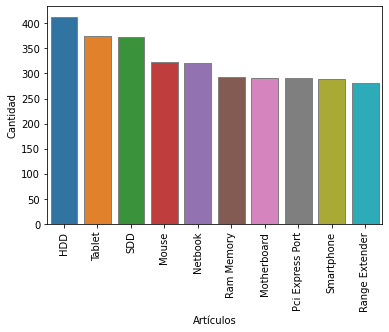

In [15]:
# RESOLUCIÓN GRÁFICA

sns.barplot(data=df7, x=df7.index, y='quantity', edgecolor='gray')
plt.xlabel('Artículos')
plt.ylabel('Cantidad')
plt.xticks(rotation=90) # 'vertical'
plt.show()


<h3>2. ¿Qué artículo es el que más ingresos nos proporcionó?</h3>

In [16]:
# RESOLUCIÓN ANALÍTICA
df2 = my_df.groupby(by='article_name').sum().sort_values('total_amount', ascending=False).head(5)
pd.options.display.float_format= '$ {:,.2f}'.format
print(df2['total_amount'])



article_name
Full Pc      $ 538,335.93
Notebook     $ 251,000.00
Smartphone   $ 152,250.00
Chair         $ 69,477.48
Tablet        $ 48,620.00
Name: total_amount, dtype: float64


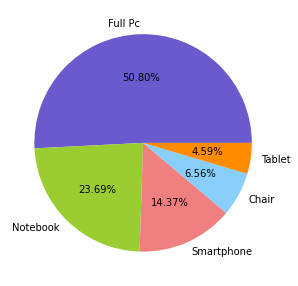

In [17]:
# RESOLUCIÓN GRÁFICA 
plt.figure(figsize=(12,5))
c = ['slateblue', 'yellowgreen', 'lightcoral', 'lightskyblue','darkorange']
plt.pie(x=df2['total_amount'], labels=df2.index, autopct='%1.2f%%', colors=c)
plt.show()

<h3>3. ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>

In [18]:
# RESOLUCIÓN ANALÍTICA
df4 = my_df.groupby(by='seller_name').sum().sort_values('total_amount', ascending=False)
pd.options.display.float_format= '$ {:,.2f}'.format

print(df4[['quantity'] + ['total_amount']].head(5))


                   quantity  total_amount
seller_name                              
Janel O'Curran          703  $ 192,832.47
Brockie Patience        441  $ 142,709.88
Oliviero Charkham       555  $ 141,329.76
Vasily Danilyuk         521  $ 129,157.55
Daisie Slograve         554  $ 120,520.11


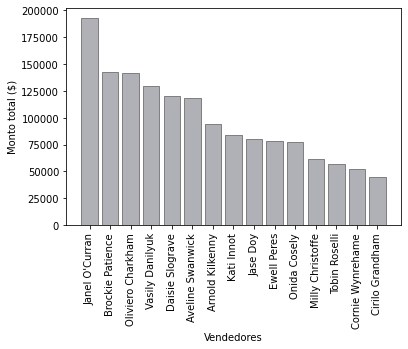

In [19]:
# RESOLUCIÓN GRÁFICA
plt.bar(df4.index, df4['total_amount'], edgecolor='gray', color='#b0b1b6')
plt.xticks(rotation=90)
plt.ylabel('Monto total ($)')
plt.xlabel('Vendedores')
plt.show()

<h3>4. ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<h4>Si es así, ¿en qué momento debería lanzar una campaña de promociones?</h4>


In [20]:
# RESOLUCIÓN ANALÍTICA
df5 = my_df.groupby(by='week').sum().sort_values('total_amount', ascending=False)
pd.options.display.float_format= '$ {:,.2f}'.format
print(df5[['quantity'] + ['total_amount']])


      quantity  total_amount
week                        
1         2449  $ 507,458.81
2         2444  $ 415,364.44
3         2114  $ 329,140.03
4         1058  $ 223,844.56


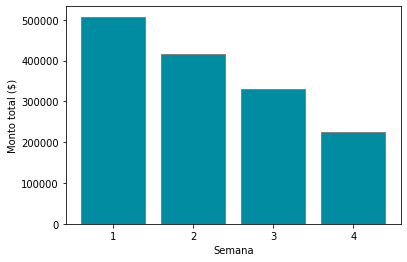

In [21]:
# RESOLUCIÓN GRÁFICA
plt.bar(df5.index, df5['total_amount'], color="#028ca1",  edgecolor='gray')
plt.xlabel('Semana')
plt.ylabel('Monto total ($)')
plt.show()

<h2>Tareas a realizar</h2>
<ul>
<li>Pensar 3 preguntas y responderlas con el método que consideres más apropiado. Al menos una de ellas debe contener la columna 'country_name' y al menos una de ellas debe discriminar por dos variables categóricas.</li>
<li>Personalizar, estilar y dar contexto a las gráficas.</li>
<li>Generar un informe en el que se responda en forma coloquial a las preguntas, agregando conclusiones y consejos que puedan surgir de este trabajo. Se pueden agregar imágenes.</li>
</ul>

<h3>5. Pregunta</h3>
<h4>Cual es el país que más vende? (por monto y por cantidad)</h4>

In [22]:
# RESOLUCIÓN
my_df_5 = my_df.groupby(by='country_name').sum().sort_values('total_amount', ascending=False).head(8)

print(my_df_5)

              quantity  total_amount
country_name                        
Brazil            2515  $ 441,271.85
Argentina          947  $ 205,832.78
Colombia           881  $ 177,514.29
Peru              1027  $ 161,421.12
Mexico             846  $ 138,619.99
Venezuela          320   $ 77,684.52
El Salvador        111   $ 57,391.26
Guatemala          202   $ 52,579.25


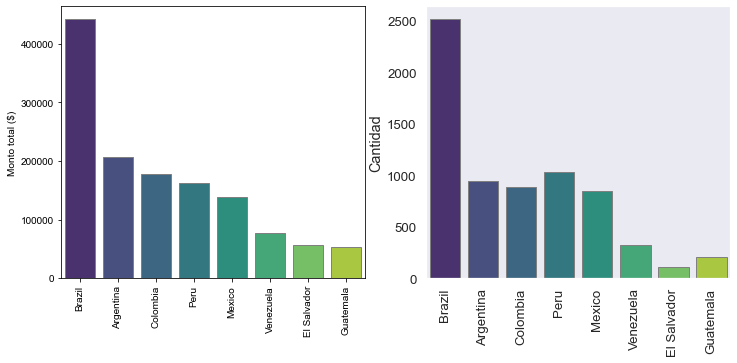

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.barplot(data=my_df_5, x=my_df_5.index, y='total_amount', palette='viridis', edgecolor='gray')
plt.xticks(rotation=90) 
plt.xlabel("")
plt.ylabel("Monto total ($)")
sns.set(style ='dark', font_scale=1.2)

plt.subplot(1, 2, 2)
sns.barplot(data=my_df_5, x=my_df_5.index, y='quantity', palette='viridis', edgecolor='gray')
plt.xticks(rotation=90) 
plt.xlabel("")
plt.ylabel("Cantidad")
sns.set(style ='dark', font_scale=1.2)

plt.show()

<h3>6. Pregunta</h3>
<h4> Cómo varían las ventas durante el mes para los 3 artículos que más ingresos proporcionan?</h4>

Considero los 3 artículos principales obtenidos a partir de la Pregunta 2

In [24]:
# RESOLUCIÓN
filtroPc = my_df['article_name'] == 'Full Pc'
df_pc_week = my_df[filtroPc].groupby(by='week').sum()
print('---------------------------')
print('\n Venta de Full Pc')
print(df_pc_week)

filtroNotebook = my_df['article_name'] == 'Notebook'
df_notebook_week = my_df[filtroNotebook].groupby(by='week').sum()
print('---------------------------')
print('\n Venta de Notebook')
print(df_notebook_week)

filtroPhone = my_df['article_name'] == 'Smartphone'
df_phone_week = my_df[filtroPhone].groupby(by='week').sum()
print('---------------------------')
print('\n Venta de Phone')
print(df_phone_week)


---------------------------

 Venta de Full Pc
      quantity  total_amount
week                        
1           97  $ 206,397.57
2           76  $ 161,713.56
3           49  $ 104,262.69
4           31   $ 65,962.11
---------------------------

 Venta de Notebook
      quantity  total_amount
week                        
1           95   $ 95,000.00
2           37   $ 37,000.00
3           41   $ 41,000.00
4           78   $ 78,000.00
---------------------------

 Venta de Phone
      quantity  total_amount
week                        
1           89   $ 46,725.00
2           93   $ 48,825.00
3           73   $ 38,325.00
4           35   $ 18,375.00


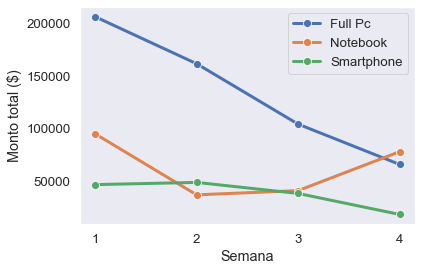

In [25]:
plt.figure(figsize=(6,4))

sns.lineplot(data=df_pc_week, x=df_pc_week.index, y='total_amount', marker='o', label='Full Pc', linewidth = 3, markersize=8)

sns.lineplot(data=df_notebook_week, x=df_notebook_week.index, y='total_amount', marker='o', label='Notebook', linewidth = 3, markersize=8)

sns.lineplot(data=df_phone_week, x=df_phone_week.index, y='total_amount', marker='o', label='Smartphone', linewidth = 3, markersize=8)

plt.xlabel('Semana')
plt.ylabel('Monto total ($)')

plt.show()

<h3>7. Pregunta </h3>
<h4> Cómo se comparan las ventas de Argentina y Brasil a lo largo del mes?</h4>

In [26]:
# RESOLUCIÓN
my_df_arg_br_0 = my_df[(my_df['country_name'] == 'Argentina') | (my_df['country_name'] == 'Brazil')]
my_df_arg_br = my_df_arg_br_0.groupby(['country_name','week']).sum()
my_df_arg_br.reset_index(inplace=True)
print('\n Ventas de Argentina y Brasil por semana')
print(my_df_arg_br)


 Ventas de Argentina y Brasil por semana
  country_name week  quantity  total_amount
0    Argentina    1       275   $ 63,760.48
1    Argentina    2       413   $ 96,789.13
2    Argentina    3       160   $ 26,601.97
3    Argentina    4        99   $ 18,681.20
4       Brazil    1       765  $ 165,289.90
5       Brazil    2       664  $ 106,803.85
6       Brazil    3       646   $ 79,341.50
7       Brazil    4       440   $ 89,836.60


Text(0, 0.5, 'Cantidad')

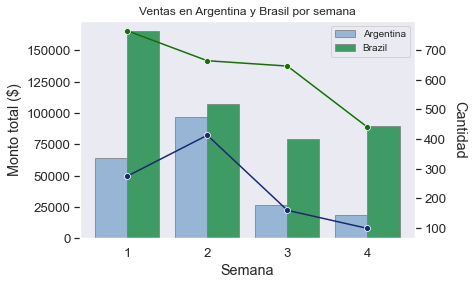

In [27]:
plt.figure(figsize=(6,4))
ax1 = sns.barplot(data=my_df_arg_br, x='week', y="total_amount", hue="country_name", palette=['#75aadb', '#009b3a'], alpha=0.8, edgecolor='gray')
plt.legend(fontsize=10)
ax2 = ax1.twinx()
sns.lineplot(data=my_df_arg_br, x='week', y='quantity', hue="country_name", marker='o', ax=ax2, legend=None, palette=['#182970', '#166e07'])
plt.title('Ventas en Argentina y Brasil por semana', size=12)
ax1.set_xlabel("Semana")
ax1.set_ylabel("Monto total ($)")
ax2.set_ylabel("Cantidad", rotation=-90,labelpad = 20)


<h2>Conclusiones y propuestas</h2>

Los artículos más vendidos son **HDD**, **Tablet** y **SDD**, sin embargo, estos artículos no son lo que más ingresos generan, ellos son **Full Pc**, **Notebook** y **Smartphone**. El artículo **Full Pc** representa la mitad de los ingresos totales, mientras que las **Notebooks** representan casi la cuarta parte. 
De los 3 artículos que más ingresos generan, las **Notebooks** son las únicas que recuperan ventas en las últimas dos semanas. Por el contrario, los artículos **Full Pc** y **Smartphone** generan mayores ingresos las primeras semanas que hacia el final del mes. 
Un vendedor se destaca del resto, **Janel O'Curran**, con ventas hechas por casi $200.000.
El país que más ventas tiene es **Brasil**, por más del doble de montos que **Argentina**, que es el segundo país en ventas. A la vez, Brasil vende más del doble de artículos que **Perú** (segundo país líder en cantidad de artículos). 
En la comparación entre **Argentina** y **Brasil**, se observa que la segunda semana del mes la cantidad de ventas de Argentina aumenta. Esto  hace que se equiparen los ingresos de esta segunda semana con los montos ingresados por Brasil. Sin embargo, en las últimas dos semanas del mes, en Argentina la cantidad de artículos vendidos es escasa y la diferencia con Brasil se acentúa, tanto en monto como en cantidad de artículos.  
Las ventas totales a lo largo del mes van disminuyendo semana a semana de manera casi monótona. Esto indica que la primer semana es la de mayor venta, por lo tanto si se quisiera mantener más o menos constante las ventas a lo largo del mes, habría que focalizar las estrategias de venta hacia las últimas semanas. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ffac6bd0-3239-4a83-a3e9-454accf9bdec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>